# Inspect Relatedness Output

In [40]:
library(data.table)
library(ggplot2)
library(dplyr)
library(repr) ## to control plot sizes in notebooks
options(jupyter.plot_mimetypes = 'image/png') ## to avoid bloated size if we make big vector graphics

In [25]:
cols <- c('SAMPLE_X','SAMPLE_Y','f_X','f_X_ll','f_Y','f_Y_ll','θ_XY','θ_ll','γ_XY','γ_XY_ll',
          'γ_YX','γ_YX_ll','δ','δ_ll','Δ','Δ_ll','null_ll','fit')

In [26]:
DT <- fread('./MAPGD_WORKING/TPP.subset.relatedness.rel',col.names = cols,drop=19)

Warning message in fread("./MAPGD_WORKING/TPP.subset.relatedness.rel", col.names = cols, :
"Detected 18 column names but the data has 19 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file."

In [27]:
DT[1:3]

SAMPLE_X,SAMPLE_Y,f_X,f_X_ll,f_Y,f_Y_ll,θ_XY,θ_ll,γ_XY,γ_XY_ll,γ_YX,γ_YX_ll,δ,δ_ll,Δ,Δ_ll,null_ll,fit
0,1,0.000000,0.000000,0.000000,0.000000,0.0000000,0.000000,0.0000000,0.0000,0.0000000,0.000000,0.00000000,0.000000,0.0000000,0.000000,Inf,10.29270
0,2,0.000000,0.000000,0.000000,0.000000,0.0000000,0.000000,0.0000000,0.0000,0.0000000,0.000000,0.00000000,0.000000,0.0000000,0.000000,7.21187,7.21187
0,3,-0.112626,0.382955,-0.026897,0.349808,-0.0342967,0.478569,0.0317293,1.3662,0.0741492,0.705012,-0.00303106,0.376231,0.0248325,0.725188,Inf,13.36890


### Columns

- f inbreeding coefficient
- θ-XY  coefficient of coancestry
- Δ coefficient  of cofraternity -  the association of zygosity between individuals
- δ The fourth-order zygosity correlation of genotypes between individuals X and Y, which is the probability that all four alleles in the two individuals are identical by descent.
- γ-XY The inbred-relatedness, which is the probability of sampling a locus where individual X is inbred and also related to individual Y

## Read the Metadata

and add in integer sample index

In [28]:
DTmeta <- fread('./190122_pop_subset_metadata.tsv')
DTmeta[,Index:=.I-1]

In [29]:
DTmeta[1:3]

Unique_sample_ID,Location2,Collection_Group,Sex,bam_path,Index
0002_140826_Hon01_F,Sinuapa,Honduras_1,F,bamfiles/season1_trim_C732HANXX-1587-01-25-1_L007_map_190110_2_RG.bam,0
0003_140826_Hon02_M,Sinuapa,Honduras_1,M,bamfiles/season1_trim_C732HANXX-1587-02-25-1_L007_map_190110_2_RG.bam,1
0004_140826_Hon02_F,Sinuapa,Honduras_1,F,bamfiles/season1_trim_C732HANXX-1587-03-25-1_L007_map_190110_2_RG.bam,2


Joining, by = "Index"


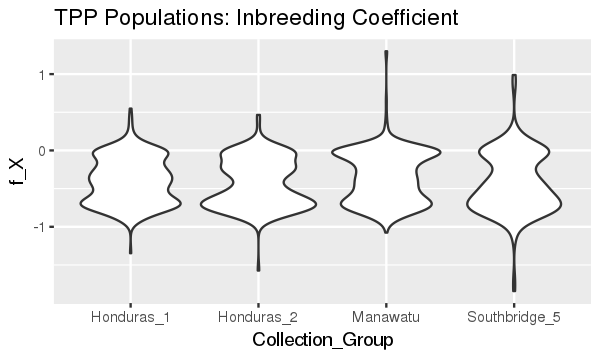

In [48]:
options(repr.plot.width=5, repr.plot.height=3)
unique(DT[,c(1,3)]) %>% 
    rename(Index=SAMPLE_X)  %>% 
    inner_join(DTmeta) %>%
    ggplot(aes(x=Collection_Group,y=f_X)) +
    geom_violin() +
    ggtitle('TPP Populations: Inbreeding Coefficient')

## Inspect other Coefficients by Population

- perform 2 joins to add the population of origin to sample x, sample 7

In [ ]:
DT %>% inner_join(DTmeta[])